### The shape of $\chi^2$ and convergence to Gaussian

The idea of this notebook is to play with the shape of the $\chi^2$ distribution, and see how it converges towards a Gaussian for large numbers of degrees of freedom

First, the usual set up:

In [1]:
import numpy as np
from math import *
from scipy import stats 
import matplotlib.pyplot as plt

Now we input the number of degrees of freedom $\nu$ and initialise the arrays we will need.

In [20]:
###### set parameters
nu=4  # degrees of freedom
######
meanc2=nu # expected mean of P(chisq)
sigc2=sqrt(2.*nu) # expected std.dev of P(chisq)
plotmin=0.0 # min value of chisq in plot (normally 0)
plotmax=5.*meanc2 #max value of chisq in plot
deltac2=0.01 # plot resolution
# initialise array with resolution delta-x
c2=np.arange(plotmin,plotmax,deltac2)
#initialise the P-arrays for chisq and gaussian
npts=len(c2)

Next calculate the chisq prob density versus chisq, and also the prob density for a Gaussian with the same mean and dispersion as the chisq distribution 

In [21]:
# note that because c2 is an array, these routines automatically step through npts
Pc2=stats.chi2.pdf(c2,nu)            
PG=stats.norm.pdf(c2,meanc2,sigc2)  


Finally, plot both chisq and Gaussian, and mark mean and variance.

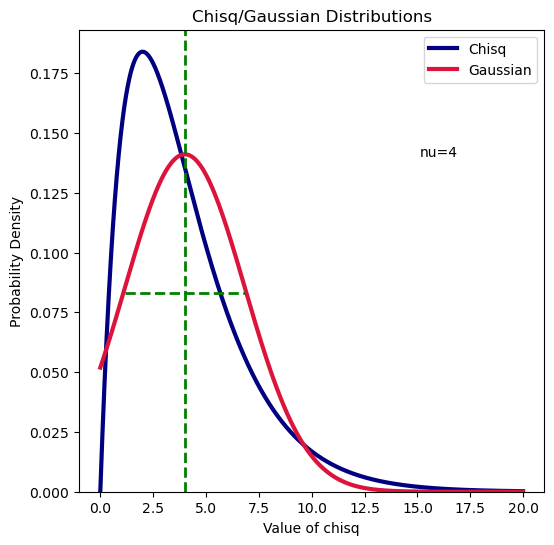

In [22]:

# Create Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Chisq/Gaussian Distributions")
ax.set_xlabel("Value of chisq")
ax.set_ylabel("Probability Density")

# Plot Chisquare and Gaussian distributions using Matplotlib
ax.plot(c2, Pc2, label="Chisq", color="navy", linewidth=3)
ax.plot(c2, PG, label="Gaussian", color="crimson", linewidth=3)

# Plot vertical line at meanc2
Pmaxc2 = np.max(Pc2)
PmaxG = np.max(PG)
ax.axvline(x=meanc2, ymin=0, ymax=1, color='green', linestyle='dashed', linewidth=2)

# Plot horizontal line to mark +/- sigma
ax.hlines(y=PmaxG/1.7, xmin=meanc2-sigc2, xmax=meanc2+sigc2, color='green', linestyle='dashed', linewidth=2)

# Label the plot
nuvalue = 'nu=' + str(nu)
ax.text(4 * nu, Pmaxc2 / 2.0 + 0.05, nuvalue, ha='center', va='center')

# Show legend
ax.legend()
ax.set_ylim(0)
# Show the Matplotlib plot
plt.show()


#### Explore

Play with nu. You will see that for small values of nu, chisq is very asymmetric. As you increase nu, it becomes more symmetric, and closer to the Gaussian with the same mean and variance.

#### Using the Gaussian as a Chisq approximation

Looking up $P(>\chi^2)$ in tables is a bit tedious. Can we use the Gaussian as a quick approximation? Suppose we have $\nu=8$ degrees of freedom. Then we expect to see $\chi^2=\nu=8$ on average, but with a dispersion of $\sigma=\sqrt(2\nu)=4$. Suppose then we find $\chi^2=15.2$ for our data. This is a "1.8$\sigma$" effect. We remember for a Gaussian, the one-tailed threshold for 95% confidence is at 1.65$\sigma$. So this sounds like a significant effect. But can we trust the Gaussian approximation? How large a value of $\nu$ is needed for this to be a good approximation?

One way to check this is to plot the *cumulative* distributions for the $\chi^2$ and Gaussian distributions:

Playing with nu, you can see that the agreement is pretty good even for modest nu.  The cumulative distributions, which we actually use in the test, are quite close, however, the probability distributions look clearly different.  The Gaussian even allows for negative $\chi^2$, which is clearly nonsense!

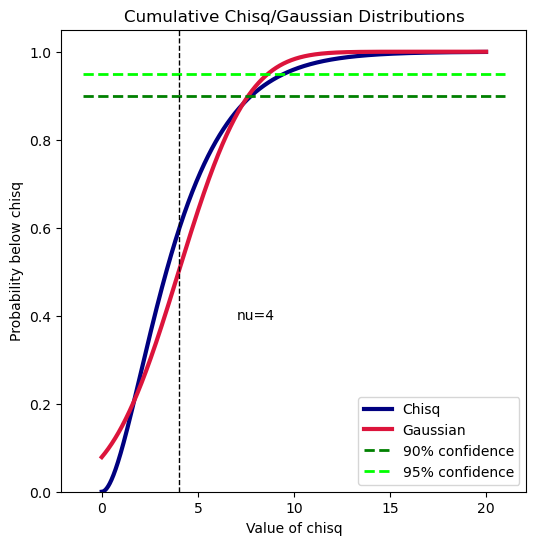

In [23]:
Cc2 = stats.chi2.cdf(c2, nu)
CG = stats.norm.cdf(c2, meanc2, sigc2)

# Create Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Cumulative Chisq/Gaussian Distributions")
ax.set_xlabel("Value of chisq")
ax.set_ylabel("Probability below chisq")

# Plot Cumulative Chisquare and Gaussian distributions using Matplotlib
ax.plot(c2, Cc2, label="Chisq", color="navy", linewidth=3)
ax.plot(c2, CG, label="Gaussian", color="crimson", linewidth=3)

# Plot horizontal line at 90%, 95% of total probability
plotmin, plotmax = ax.get_xlim()
ax.hlines(y=0.9, xmin=plotmin, xmax=plotmax, color='green', label="90% confidence", linestyle='dashed', linewidth=2)
ax.hlines(y=0.95, xmin=plotmin, xmax=plotmax, color='lime', label="95% confidence", linestyle='dashed', linewidth=2)

ax.axvline(x=nu, ymin=0, ymax=1, color='black', linestyle='dashed', linewidth=1)

# Label the plot
nuvalue = 'nu=' + str(nu)
ax.text(2*nu, 0.4, nuvalue, ha='center', va='center')

# Show legend
ax.legend()
ax.set_ylim(0)
# Show the Matplotlib plot
plt.show()
